In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd

In [ ]:
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Magister/Desafío 1 MLA - Forecasting/training_series.csv")

In [ ]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000
...,...,...,...,...,...,...,...
1242,2021-12-08,4690.859863,4705.060059,4674.520020,4701.209961,4701.209961,3061550000
1243,2021-12-09,4691.000000,4695.259766,4665.979980,4667.450195,4667.450195,2851660000
1244,2021-12-10,4687.640137,4713.569824,4670.240234,4712.020020,4712.020020,2858310000
1245,2021-12-13,4710.299805,4710.299805,4667.600098,4668.970215,4668.970215,3322050000


In [ ]:
df1["Date"]=pd.to_datetime(df1['Date']) 

In [ ]:
df2=df1[["Date","Close"]]

In [ ]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000
...,...,...,...,...,...,...,...
1242,2021-12-08,4690.859863,4705.060059,4674.520020,4701.209961,4701.209961,3061550000
1243,2021-12-09,4691.000000,4695.259766,4665.979980,4667.450195,4667.450195,2851660000
1244,2021-12-10,4687.640137,4713.569824,4670.240234,4712.020020,4712.020020,2858310000
1245,2021-12-13,4710.299805,4710.299805,4667.600098,4668.970215,4668.970215,3322050000


In [ ]:
df2.columns=["ds","y"]

In [ ]:
df2

,ds,y
0,2017-01-03,2257.830078
1,2017-01-04,2270.750000
2,2017-01-05,2269.000000
3,2017-01-06,2276.979980
4,2017-01-09,2268.899902
...,...,...
1242,2021-12-08,4701.209961
1243,2021-12-09,4667.450195
1244,2021-12-10,4712.020020
1245,2021-12-13,4668.970215


In [ ]:
modelo = Prophet() 
modelo.fit(df2) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo.make_future_dataframe(periods=24, freq='D')

In [ ]:
futuro

,ds
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
1266,2022-01-03
1267,2022-01-04
1268,2022-01-05
1269,2022-01-06


In [ ]:
prediccion = modelo.predict(futuro) 
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
1266,2022-01-03,4791.302349,4683.512970,4892.756815,4811.299854,4809.764083,4812.937254
1267,2022-01-04,4802.773690,4706.234222,4902.061332,4814.219797,4812.235163,4816.518211
1268,2022-01-05,4809.799409,4709.267045,4909.890287,4817.139740,4814.718584,4820.304120
1269,2022-01-06,4817.802234,4713.359622,4913.163083,4820.059683,4817.069219,4824.200694
1270,2022-01-07,4827.412628,4720.928409,4922.524969,4822.979626,4819.430593,4827.685056


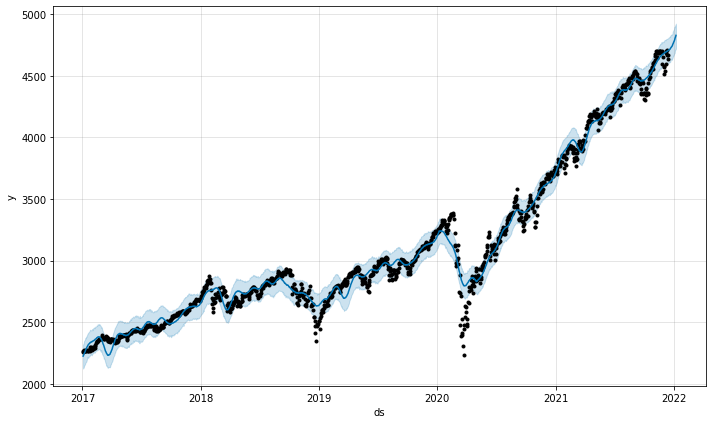

In [ ]:
fig1 = modelo.plot(prediccion) 

In [ ]:
prediccion["ds"]=pd.to_datetime(prediccion["ds"])

In [ ]:
mask = (prediccion['ds'] > '2021-12-14')


In [ ]:
df3=prediccion[["ds","yhat"]].loc[mask]

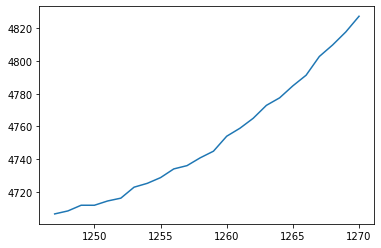

In [ ]:
plt.plot(df3["yhat"])

In [ ]:
df3.to_csv("/content/drive/MyDrive/Magister/Desafío 1 MLA - Forecasting/resultado_profeta.csv")